# TP Classification

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Nuage de points à analyser

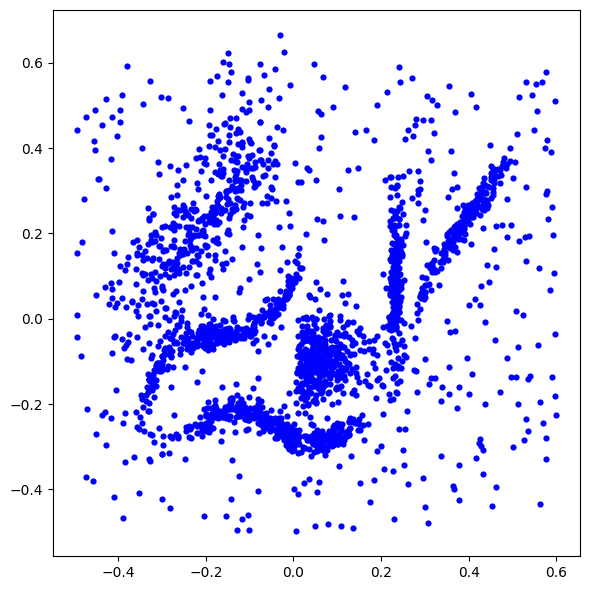

In [5]:
data = np.load('./classification.npy')
plt.figure(figsize=(6,6))
plt.scatter(data.T[0], data.T[1], c='b',  s = 20, linewidths=0)
plt.tight_layout()

## Votre travail 

Classer ce nuage de points avec les algorithmes vus en cours : 
-  [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)
- [clustering hiéarchique](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

Pour ces méthodes, vous déterminerez le nombre optimal de classes. Vous experimenterez divers paramètres (initialisation des centres, liens min, max, lien de Ward,...).
Vous pourrez évaluer la qualité de la partition en utilisant l'indice de [silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette#sklearn.metrics.silhouette_score)


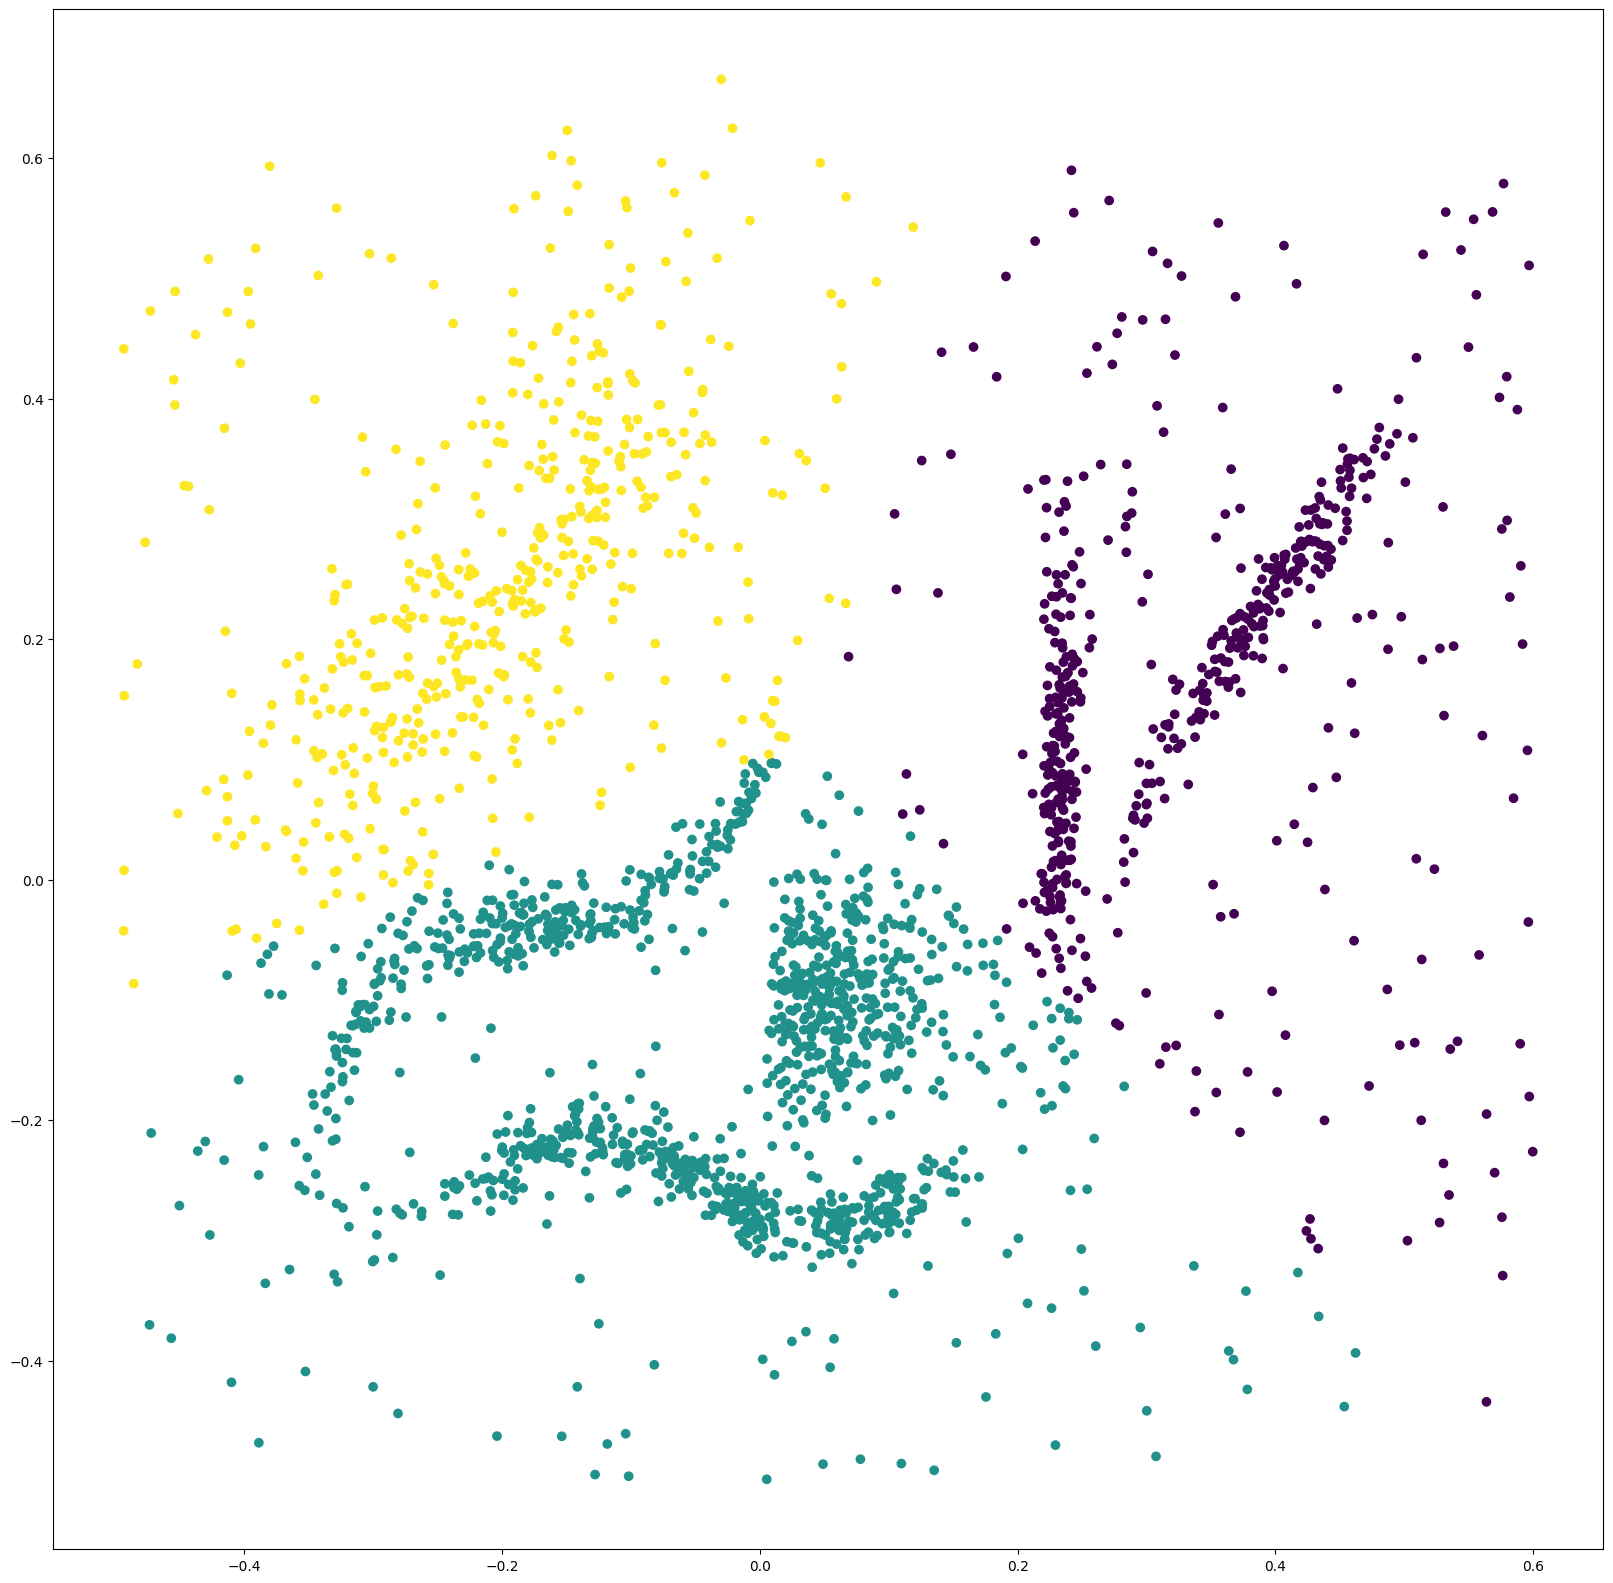

3 0.46319107032549806


In [42]:
import sklearn as skl
import random as rd

k_max = 30
k_min = 2
best_score = -1
random_state = rd.randint(0, 3000)
for k in range(k_min, k_max+1):
    classification = skl.cluster.KMeans(k, random_state=random_state).fit(data)
    score = skl.metrics.silhouette_score(data, classification.labels_)
    if score > best_score:
        best_score = score
        best_k = k 

classification = skl.cluster.KMeans(best_k, random_state=random_state).fit(data)
plt.figure(figsize=(20, 20))
plt.scatter(data[:, 0], data[:, 1], c=classification.labels_)
plt.show()
print(best_k, best_score)

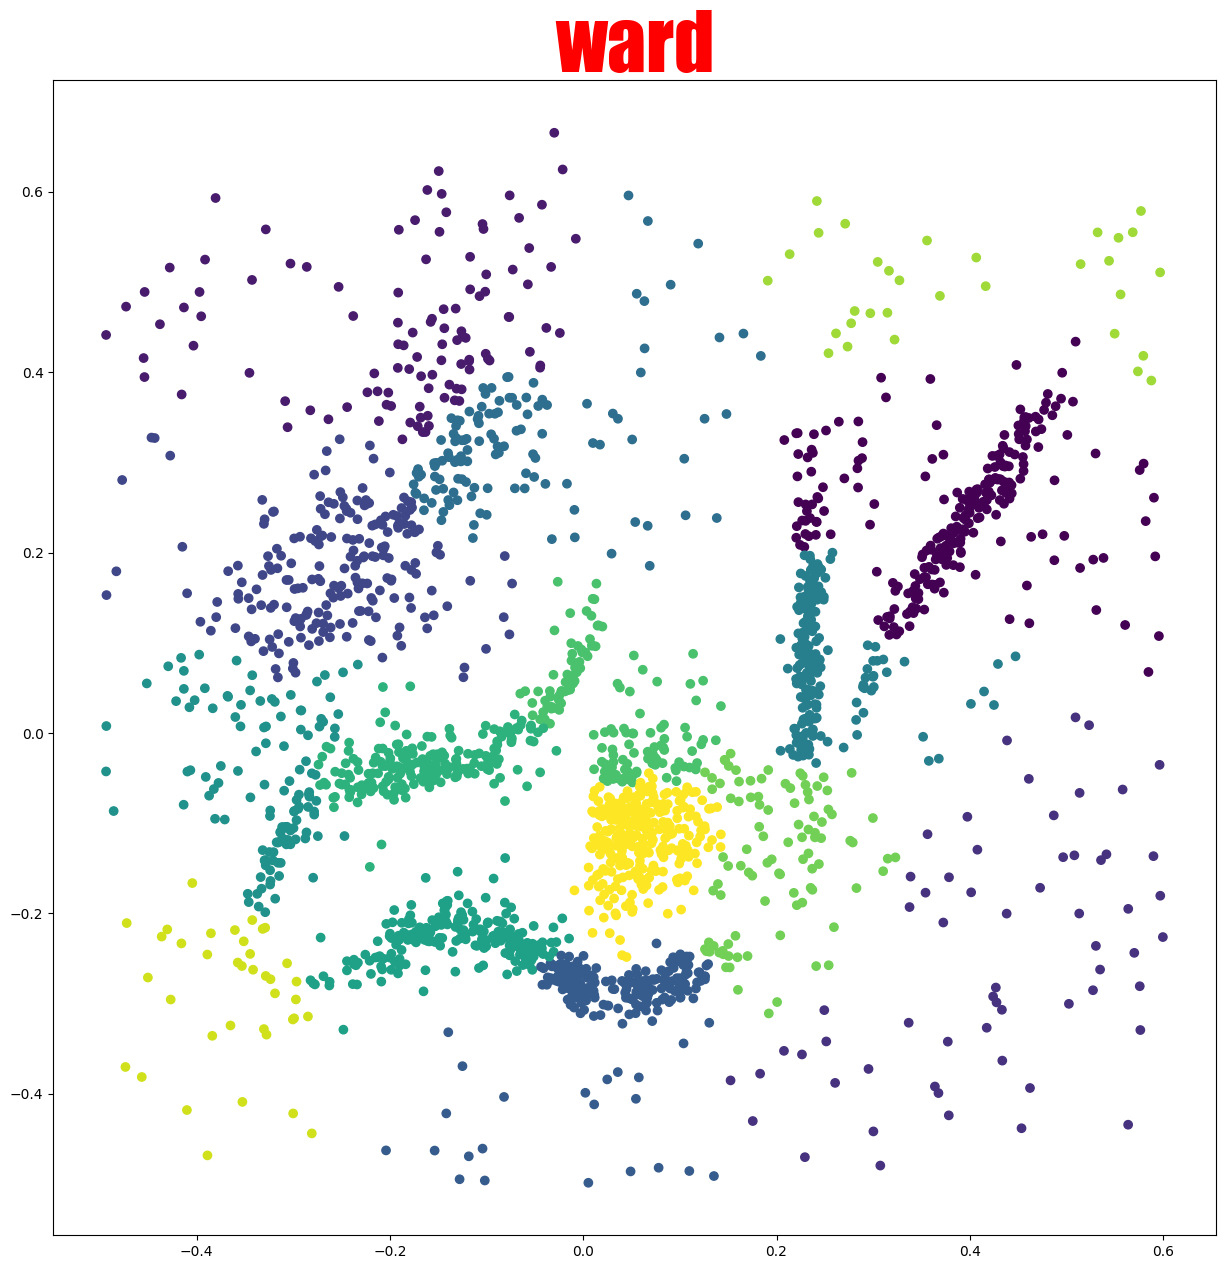

15 0.3853369282443522


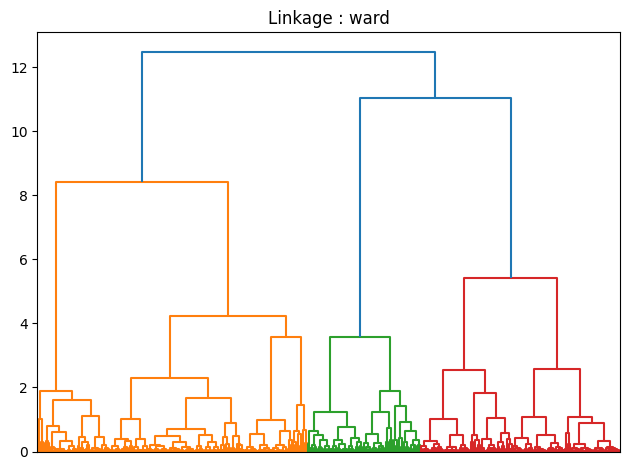

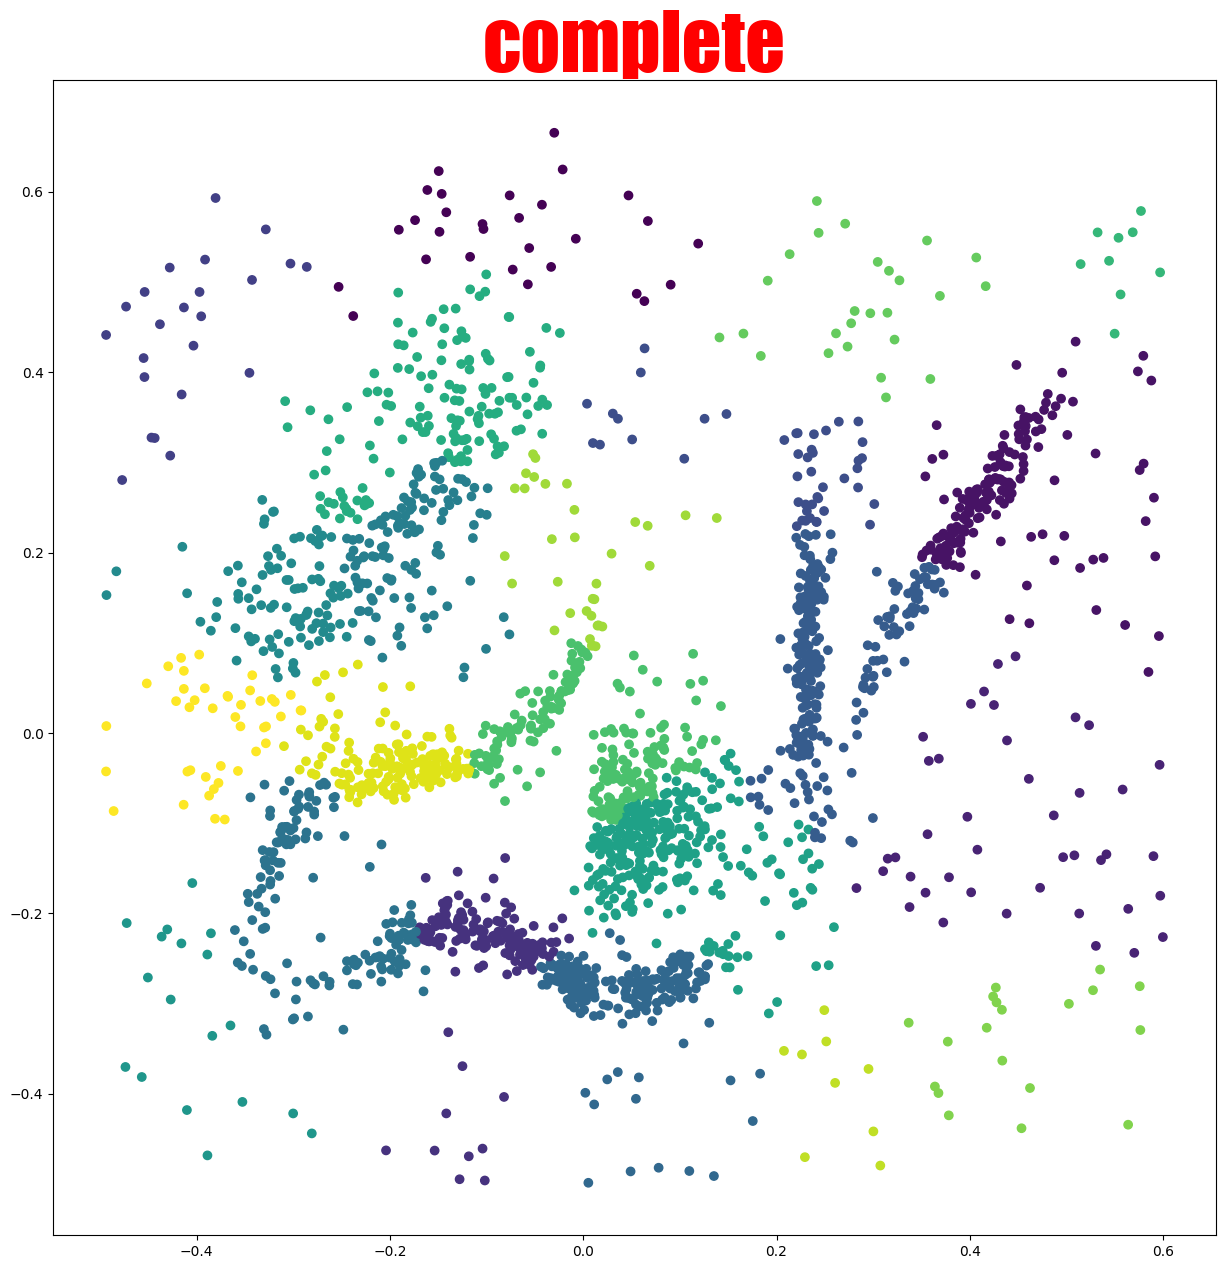

22 0.3472855480390893


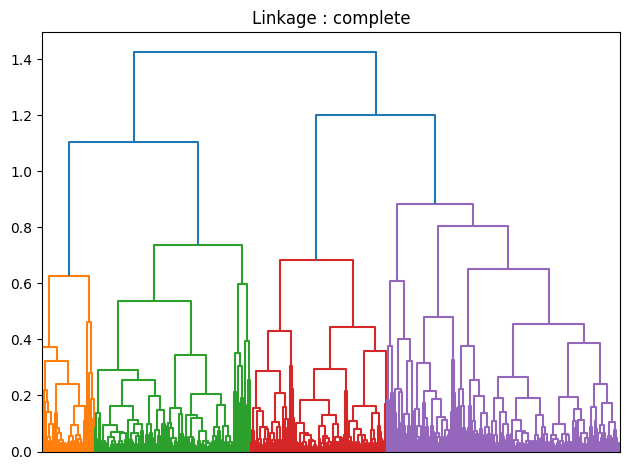

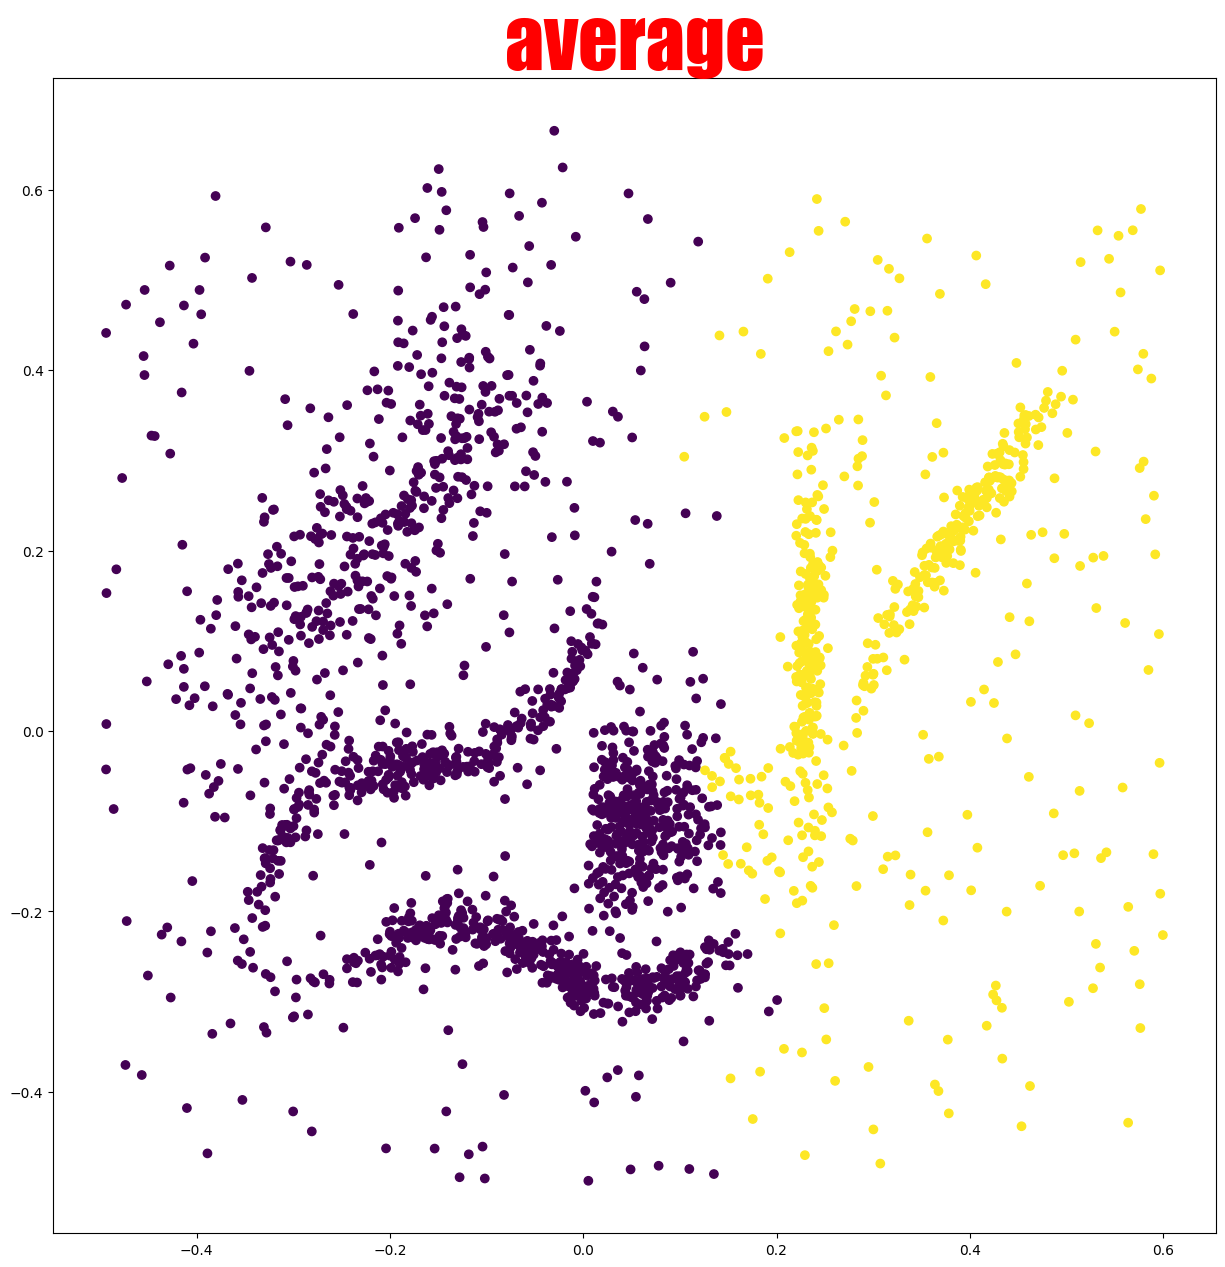

2 0.39470155440592636


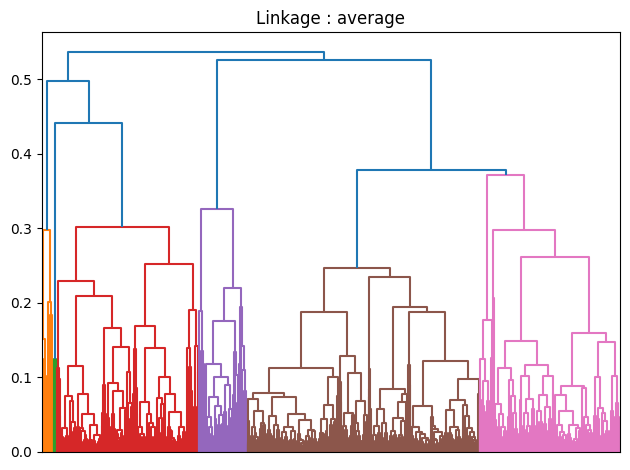

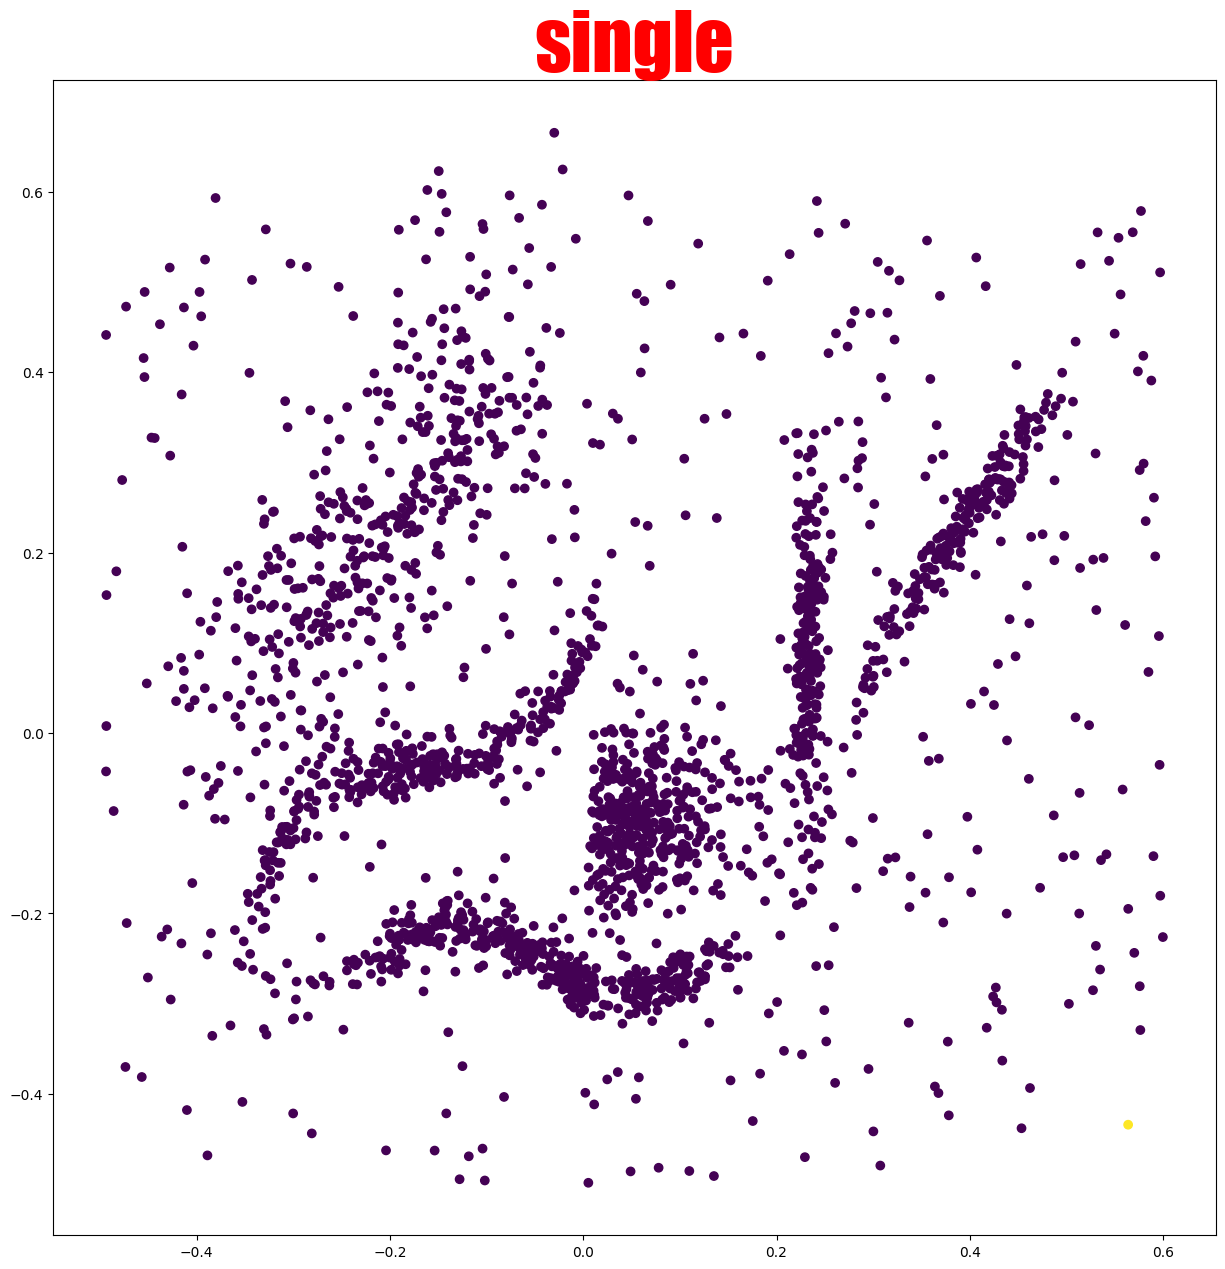

2 0.4251909460300413


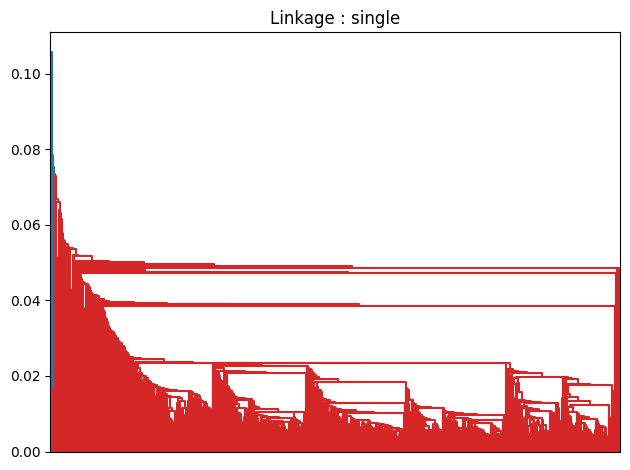

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

def clustering(method, k_min, k_max):
    best_score = -1
    for k in range(k_min, k_max+1):
        classification = skl.cluster.AgglomerativeClustering(k, linkage=method).fit(data)
        score = skl.metrics.silhouette_score(data, classification.labels_)
        if score > best_score:
            best_score = score
            best_k = k 

    classification = skl.cluster.AgglomerativeClustering(best_k, linkage=method).fit(data)
    plt.figure(figsize=(15, 15))
    plt.scatter(data[:, 0], data[:, 1], c=classification.labels_)
    plt.title(method, fontdict={'size':56, 'color':'red', 'family':'impact'})
    plt.show()
    print(best_k, best_score)

    # On affiche le dendrogramme
    Z = linkage(data, method=method)
    dendrogram(Z, no_labels=True)
    plt.title("Linkage : " + method)
    plt.tight_layout()

k_max = 30
k_min = 2
list_linkage = ["ward", "complete", "average", "single"]
for i in range(len(list_linkage)):
    clustering(list_linkage[i], k_min, k_max)

